In [70]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch the Domain of your Project*</span>

<span style="color:red">In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?***  

For this final project, I would like to investigate the social context and cultural patterns in the U.S. by analyzing musical expressions of U.S. songs in different periods. Singers often convey their judgments and conflicts about lifestyle and personal identity through the song lyrics. And these conflicts often reflect the bigger social and political issues in that time period. Specifically, I'll perform sentiment analysis on the song lyrics and use topic modeling to find out the themes and social factors behind these expressions. I'll conduct these analysis in the context of cultural changes.

## ***Why?***

People often use music as a way to communicate their feelings and thoughts. Musical expression of emotions can be basic and universal - they convey wide-shared values or experiences. They can also depend on the social context and individual listeners - music are open to multiple interpretations. Music are often considered as reflections of the society and culture in which they were produced. Hence, understanding musical expressions can help us learn more about the social context and culture patterns in our living.

In addition, if we are able to discover the themes behind the musical expressions in each time period, we may be able to predict the changes in society and culture based on the music we are listening to. In this way, we not only employ inferences to understand the relationship between music and ourselves, but also use prediction to create a better future.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

Due to time constraint, my samples are confined to the most popular songs in the U.S. over the past decade. By which our samples includes only songs produced by the most popular singers in the most popular music genres. It may not capture the most interesting trends in the society and culture, but it definitely reflects the mainstream expressions that many people can relate to. 

My samples can be limited. For further analysis, I would like to include more music genres in the U.S. and look at the similarity and differences between the themes in each genre. In addition, it will also be interesting if I can compare the themes in different countries and in different periods. It will allow us to make cross-category comparison and validation.

# Annotation Dataset
My dataset included a subset of Kanye West's rap verses. The whole dataset is downloaded from Kaggle. I asked 5 respondents to code for the sentiment of the lyrics, and I pretended to be a bad coder (coder 4). The sentiment score ranges from 0 (negative) to 10 (positive), with 5 being neutral. 

In [71]:
df = pd.read_csv("kanye_west_coding.csv")
anno = AnnotationsContainer.from_array(df.values[:,1:])

In [72]:
anno.annotations

array([[ 0,  1,  0,  5,  1,  1],
       [ 0,  2,  1,  6,  1,  1],
       [ 0,  2,  1,  5,  0,  0],
       [ 3,  3,  5,  8,  4,  2],
       [ 6,  5,  4,  2,  6,  7],
       [ 9,  9, 10,  5,  8,  7],
       [10, 10,  9,  4,  9,  9],
       [ 7,  5,  8,  5,  6,  7],
       [ 5,  7,  6, 10,  6,  5],
       [10, 10,  9,  3,  9, 10],
       [ 7,  6,  7,  5,  8,  8],
       [ 9,  7,  9,  2,  8,  9],
       [ 7,  9, 10,  5,  9, 10],
       [ 4,  5,  2, 10,  3,  3],
       [ 6,  6,  5,  4,  7,  5],
       [ 3,  2,  3,  7,  3,  2],
       [10, 10,  9,  5,  9, 10],
       [ 5,  7,  7,  1,  6,  5],
       [ 7,  8,  8,  4,  8,  9],
       [ 7,  7,  8,  5,  7,  7],
       [ 6,  8,  7,  1,  5,  7],
       [ 5,  4,  5,  9,  5,  3],
       [ 3,  5,  6,  5,  4,  2],
       [ 4,  6,  6,  8,  4,  5],
       [ 9,  8,  9,  5,  8,  8],
       [ 3,  2,  2,  5,  1,  2],
       [ 6,  5,  6,  2,  5,  5],
       [ 3,  5,  4,  7,  3,  2],
       [ 7,  7,  6,  1,  8,  6],
       [ 6,  5,  7,  7,  7,  8],
       [ 6

In [73]:
anno.labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Annotation Statistics

In [74]:
pyanno.measures.agreement.labels_frequency(anno.annotations, 11)

array([0.04975124, 0.06467662, 0.05970149, 0.05721393, 0.04726368,
       0.16666667, 0.10945274, 0.15174129, 0.13930348, 0.09701493,
       0.05721393])

First, use Cohen's $\kappa$ to measure agreement between coders:

In [75]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[ 1.          0.13333333  0.12834626 -0.06966618  0.22718154  0.25647349]
 [ 0.13333333  1.          0.12943528 -0.08915418  0.21935157  0.24208145]
 [ 0.12834626  0.12943528  1.         -0.09374227  0.15892543  0.21802831]
 [-0.06966618 -0.08915418 -0.09374227  1.         -0.10660661 -0.12253063]
 [ 0.22718154  0.21935157  0.15892543 -0.10660661  1.          0.24227193]
 [ 0.25647349  0.24208145  0.21802831 -0.12253063  0.24227193  1.        ]]


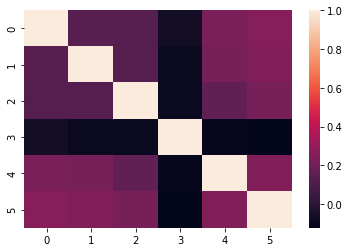

In [68]:
ax = seaborn.heatmap(m)
plt.show()

In [27]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.09824858176710678

The score of the average Cohen's $\kappa$ for all pairs of coders that have coded against one another is low. It could be due to the fact that the average Cohen's $\kappa$ has not been weighted and it takes into account of the scores of bad coder seriously. It could also be that the range of sentiment score is large, so that respondents will have different codings even if they agree that the sentiment of a verse is positive. However, the heatmap shows that coder 4 might not be reliable because of the low agreement scores with other coders.

In [28]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.3654087173402977

The score of weighted $\kappa$ averaged over all pairs of coders is much better.

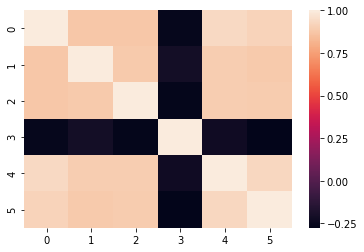

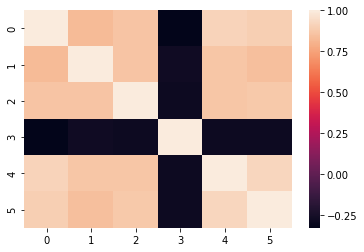

In [29]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

The correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders showed that coder 4 (in column 3) is very different from other coders. On the other hand, the scores of other 5 coders are highly correlated.

In [30]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.5185280609055136 0.486680510989607


The score is the average over all comparable pairs. Overall, our result suggests that the sentiment scores of all coders (except coder 4) are highly correlated and they tend to agree on the sentiment of the rap verses. To improve the agreement score in future analysis, I can create a smaller scale (e.g. 1-5) for sentiment score and ask more respondents to provide codings for the verses.

# Models

In [76]:
# create a new instance of model A, with 11 label classes and 6 annotators.
model = ModelB.create_initial_state(11, 6)

In [77]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [78]:
model.map(anno.annotations)

In [79]:
model = ModelB.create_initial_state(11, 6)
model.map(anno.annotations)

In [80]:
posterior = model.infer_labels(anno.annotations)

In [81]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

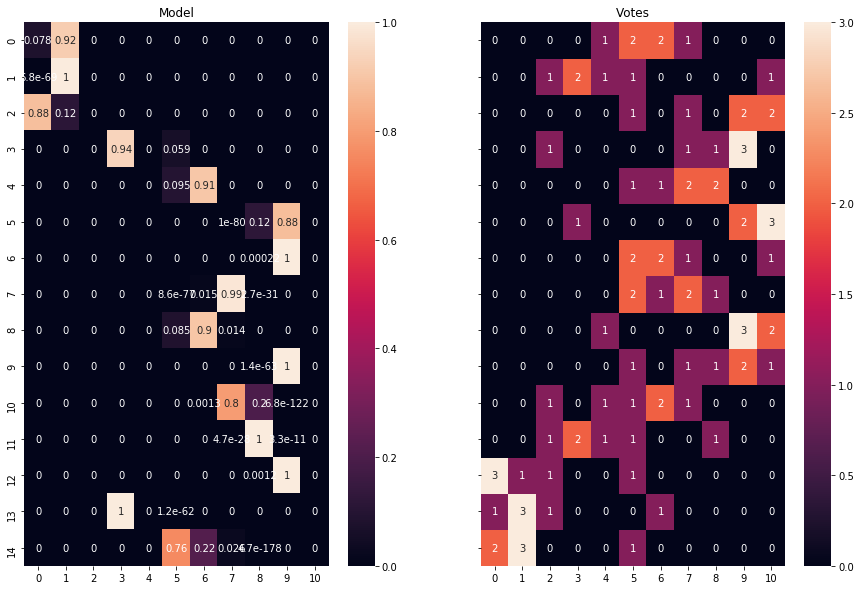

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 15

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

In [83]:
# create a new instance of model B, with 11 label classes and 6 annotators.
model = ModelBt.create_initial_state(11, 6)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.80603636 0.62557486 0.75271616 0.75154928 0.79961581 0.86724153]
-1044.4344753009073


In [84]:
model.map(anno.annotations)

In [85]:
posterior = model.infer_labels(anno.annotations)

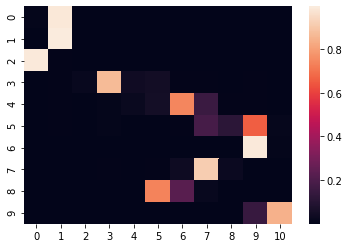

In [86]:
ax = seaborn.heatmap(posterior[:10,])
plt.show()

The heatmap suggests the verses and scores annotators tend to agree and disagree on. It would be interesting to look at the most controversial verses and think about the social factors behind these lines.

# Visualizing coder accuracy

In [87]:
model = ModelBt.create_initial_state(11, 6)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)

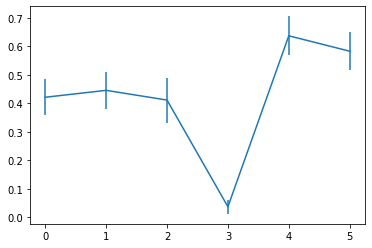

In [88]:
plt.figure()
plt.errorbar(range(6),y, yerr = y_ci)
plt.show()

As expected, coder 4 (in column 3) has the lowest accuracy score among all respondents since I pretended to be a bad coder in this case. The accuracy scores of coder 1, 2 and 3 are nearly below average. Although the most appropriate solution might be to exclude these coders that have lower agreement score with others, it would be interesting to look at the controversial verses since they might reflect the social and political issues in the cultural context. Depending on the overall agreement score among coders, we can have different strategies to deal with our selection of coders.